# Sorghum Yield Predictions with Ensemble Models

In [1]:
#important libraries
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,\
StackingRegressor,VotingRegressor,HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedKFold
from matplotlib import pyplot
from scipy.stats import sem
from numpy import mean
from numpy import std

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

import itertools
from itertools import permutations
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

%matplotlib inline

C:\Users\anishimwe2\.conda\envs\iea\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Import Train and Test Data

In [2]:
df = pd.read_csv('../../../data/data-1.5-red.csv',index_col = 0)
df.head()

PlotID Treatment      PI       CHL       EWT       LWC        SLA      N  \
0    5004        HN     NaN  468.6625  0.031408  0.748322  94.669000  3.761   
1    5005        HN     NaN  559.1375  0.031563  0.732255  86.647953  3.180   
2    5006        HN     NaN  568.8375  0.030689  0.716905  82.517814  3.161   
3    5007        HN     NaN  536.2750  0.033320  0.743147  86.833759  3.920   
4    5009        HN  BTx623  606.9375  0.040890  0.748609  72.826292  3.333   

       P     K     Mg     Ca      S     Fe    Mn    B    Cu    Zn      X350  \
0  0.372  1.49  0.209  0.726  0.200  123.0  28.0  4.4  14.7  39.0  0.051370   
1  0.454  2.32  0.184  0.542  0.192  162.0  28.0  4.2  11.0  35.0  0.060103   
2  0.355  1.76  0.169  0.577  0.174  176.0  27.0  4.7  11.4  31.0  0.099085   
3  0.412  1.58  0.233  0.565  0.209  189.0  30.0  6.6  16.2  49.0  0.069857   
4  0.405  1.74  0.215  0.416  0.193  177.0  36.0  5.7  15.8  36.0  0.094066   

       X351      X352      X353      X354      X355      X356      X357  \
0  0.052746  0.045821  0.052313  0.083602  0.062361  0.049722  0.059869   
1  0.049632  0.045581  0.067715  0.117364  0.081665  0.061088  0.077107   
2  0.113754  0.114285  0.109921  0.113212  0.119975  0.100022  0.062165   
3  0.085454  0.088989  0.076982  0.069255  0.054977  0.065542  0.083001   
4  0.106925  0.082118  0.048393  0.083301  0.093091  0.088455  0.080103   

       X358      X359      X360      X361      X362      X363      X364  \
0  0.056525  0.061510  0.053292  0.032932  0.040317  0.062231  0.070485   
1  0.068005  0.072490  0.064835  0.043043  0.049886  0.063621  0.065962   
2  0.049947  0.069289  0.077344  0.060909  0.061961  0.067800  0.066358   
3  0.055422  0.074685  0.073699  0.033566  0.039931  0.046233  0.050631   
4  0.072284  0.066456  0.063065  0.062131  0.066061  0.068730  0.061228   

       X365      X366      X367      X368      X369      X370      X371  \
0  0.052649  0.041792  0.042909  0.043065  0.032088  0.044064  0.046019   
1  0.051330  0.043448  0.041333  0.039668  0.035503  0.045181  0.046671   
2  0.054756  0.053663  0.052614  0.051131  0.052293  0.058782  0.059387   
3  0.054440  0.039023  0.048597  0.058127  0.038475  0.052666  0.052391   
4  0.046188  0.058221  0.063865  0.057511  0.047299  0.053168  0.055891   

       X372      X373      X374      X375      X376      X377      X378  \
0  0.038522  0.043813  0.047412  0.047961  0.046872  0.047312  0.048542   
1  0.040810  0.043458  0.050485  0.052210  0.047122  0.044935  0.047376   
2  0.054000  0.050389  0.053716  0.050787  0.041124  0.042028  0.043616   
3  0.036041  0.034601  0.038904  0.044369  0.046214  0.038549  0.035970   
4  0.053667  0.055631  0.047835  0.044321  0.048670  0.048353  0.047006   

       X379      X380      X381      X382      X383      X384      X385  \
0  0.048327  0.045896  0.044430  0.043528  0.044992  0.049225  0.047608   
1  0.047966  0.043590  0.042818  0.040720  0.040671  0.045761  0.044807   
2  0.044856  0.045758  0.044086  0.046838  0.048902  0.044437  0.044277   
3  0.040348  0.046270  0.037977  0.038148  0.037576  0.024449  0.031657   
4  0.045872  0.046358  0.052539  0.049135  0.044182  0.048988  0.048012   

       X386      X387      X388      X389      X390      X391      X392  \
0  0.047901  0.048735  0.043370  0.042375  0.045063  0.047908  0.045674   
1  0.047601  0.050887  0.044123  0.043528  0.045290  0.044929  0.040516   
2  0.045808  0.046552  0.045058  0.043993  0.043806  0.042900  0.037509   
3  0.037798  0.038510  0.041428  0.037517  0.036064  0.039056  0.035812   
4  0.048512  0.051255  0.052092  0.051083  0.049982  0.048607  0.043893   

       X393      X394      X395      X396      X397      X398      X399  \
0  0.041191  0.040956  0.046317  0.043229  0.042814  0.045638  0.047879   
1  0.038967  0.041709  0.045823  0.040394  0.040797  0.045123  0.045981   
2  0.041162  0.045486  0.043184  0.042651  0.039952  0.037677  0.039974   
3  0.042384  0.044726  0.035057  0.038970  0.04

In [3]:
df.shape

(827, 2170)

### Calculate Principal Components

In [4]:
sub = df[df.columns[18:-8]] #reflectance data
sub.head()

X350      X351      X352      X353      X354      X355      X356  \
0  0.051370  0.052746  0.045821  0.052313  0.083602  0.062361  0.049722   
1  0.060103  0.049632  0.045581  0.067715  0.117364  0.081665  0.061088   
2  0.099085  0.113754  0.114285  0.109921  0.113212  0.119975  0.100022   
3  0.069857  0.085454  0.088989  0.076982  0.069255  0.054977  0.065542   
4  0.094066  0.106925  0.082118  0.048393  0.083301  0.093091  0.088455   

       X357      X358      X359      X360      X361      X362      X363  \
0  0.059869  0.056525  0.061510  0.053292  0.032932  0.040317  0.062231   
1  0.077107  0.068005  0.072490  0.064835  0.043043  0.049886  0.063621   
2  0.062165  0.049947  0.069289  0.077344  0.060909  0.061961  0.067800   
3  0.083001  0.055422  0.074685  0.073699  0.033566  0.039931  0.046233   
4  0.080103  0.072284  0.066456  0.063065  0.062131  0.066061  0.068730   

       X364      X365      X366      X367      X368      X369      X370  \
0  0.070485  0.052649  0.041792  0.042909  0.043065  0.032088  0.044064   
1  0.065962  0.051330  0.043448  0.041333  0.039668  0.035503  0.045181   
2  0.066358  0.054756  0.053663  0.052614  0.051131  0.052293  0.058782   
3  0.050631  0.054440  0.039023  0.048597  0.058127  0.038475  0.052666   
4  0.061228  0.046188  0.058221  0.063865  0.057511  0.047299  0.053168   

       X371      X372      X373      X374      X375      X376      X377  \
0  0.046019  0.038522  0.043813  0.047412  0.047961  0.046872  0.047312   
1  0.046671  0.040810  0.043458  0.050485  0.052210  0.047122  0.044935   
2  0.059387  0.054000  0.050389  0.053716  0.050787  0.041124  0.042028   
3  0.052391  0.036041  0.034601  0.038904  0.044369  0.046214  0.038549   
4  0.055891  0.053667  0.055631  0.047835  0.044321  0.048670  0.048353   

       X378      X379      X380      X381      X382      X383      X384  \
0  0.048542  0.048327  0.045896  0.044430  0.043528  0.044992  0.049225   
1  0.047376  0.047966  0.043590  0.042818  0.040720  0.040671  0.045761   
2  0.043616  0.044856  0.045758  0.044086  0.046838  0.048902  0.044437   
3  0.035970  0.040348  0.046270  0.037977  0.038148  0.037576  0.024449   
4  0.047006  0.045872  0.046358  0.052539  0.049135  0.044182  0.048988   

       X385      X386      X387      X388      X389      X390      X391  \
0  0.047608  0.047901  0.048735  0.043370  0.042375  0.045063  0.047908   
1  0.044807  0.047601  0.050887  0.044123  0.043528  0.045290  0.044929   
2  0.044277  0.045808  0.046552  0.045058  0.043993  0.043806  0.042900   
3  0.031657  0.037798  0.038510  0.041428  0.037517  0.036064  0.039056   
4  0.048012  0.048512  0.051255  0.052092  0.051083  0.049982  0.048607   

       X392      X393      X394      X395      X396      X397      X398  \
0  0.045674  0.041191  0.040956  0.046317  0.043229  0.042814  0.045638   
1  0.040516  0.038967  0.041709  0.045823  0.040394  0.040797  0.045123   
2  0.037509  0.041162  0.045486  0.043184  0.042651  0.039952  0.037677   
3  0.035812  0.042384  0.044726  0.035057  0.038970  0.043261  0.042917   
4  0.043893  0.046844  0.050840  0.049994  0.050839  0.052120  0.052687   

       X399      X400      X401      X402      X403      X404      X405  \
0  0.047879  0.047047  0.044441  0.041939  0.041561  0.044752  0.046757   
1  0.045981  0.047368  0.047117  0.045181  0.043589  0.046269  0.047893   
2  0.039974  0.045524  0.046478  0.043937  0.045681  0.044032  0.041172   
3  0.037946  0.036712  0.035495  0.035056  0.039410  0.040269  0.043142   
4  0.052171  0.054946  0.054287  0.051760  0.055071  0.055043  0.053878   

       X406      X407      X408      X409      X410      X411      X412  \
0  0.045050  0.041494  0.043331  0.047099  0.048029  0.046650  0.048133   
1  0.045604  0.042084  0.044874  0.048860  0.048547  0.048192  0.049840   
2  0.041084  0.048657  0.051887  0.049826  0.046015  0.047787  0.052214   
3  0.047138  0.037958  0.039620  0.046664  0.049009  0.047955  0.047800   
4  0.054778  0.060138  0

In [5]:
n_components =15
pca = PCA(n_components)
sub_trans = pca.fit_transform(sub.values)
sub_df = pd.DataFrame(data = sub_trans
         , columns = ["PC"+str(i) for i in list(range(1,n_components+1))])
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.761549,0.438343,-0.336817,-0.120312,-0.029623,0.036094,-0.088891,-0.024397,-0.018070,-0.013735,0.000580,-0.009507,0.019072,0.019922,0.023936
1,-1.141989,0.298493,-0.481166,-0.111512,-0.026257,0.006525,-0.056873,-0.013851,-0.047874,-0.022948,0.007303,-0.007840,0.032824,0.022351,0.021914
2,-0.976640,0.194831,-0.339357,-0.046160,-0.098131,0.027840,0.026967,-0.022881,0.006370,-0.058045,-0.011066,-0.013365,0.004246,0.024743,0.048371
3,-0.380826,-0.321677,-0.020338,-0.065892,0.031698,0.033572,-0.008947,-0.035194,0.009996,-0.004848,-0.021662,-0.005644,0.018486,0.008156,0.034923
4,0.027098,-0.506937,0.058885,0.073352,-0.013862,0.062031,-0.001590,-0.010372,0.010512,-0.013369,0.016378,0.048368,-0.019843,0.031528,0.027251


<AxesSubplot:>

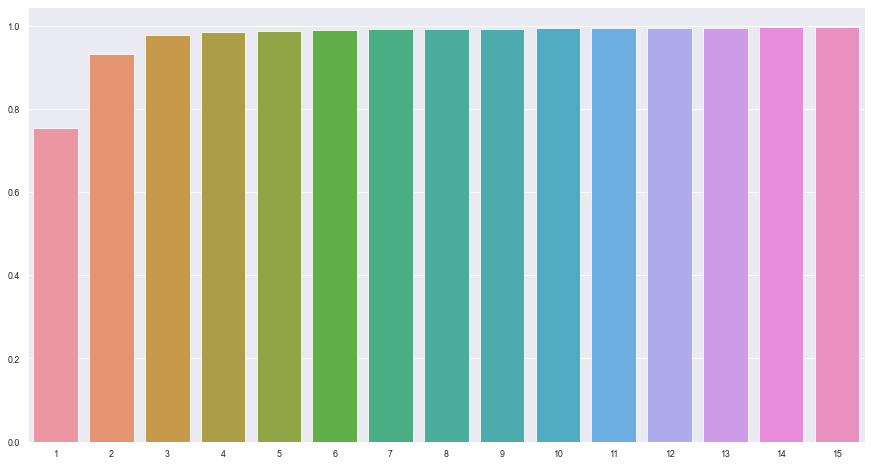

In [6]:
total_var = pca.explained_variance_ratio_.sum() * 100
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (15,8))
sns.set_context('paper')
sns.barplot(x = list(range(1,n_components+1,1)), y = exp_var_cumul)

In [7]:
total_var #explained variance

99.70620990807177

In [8]:
sub_df['DaysToBloom'] = df['DaysToBloom']
sub_df['treatment'] = df.Treatment

In [9]:
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,DaysToBloom,treatment
0,-0.761549,0.438343,-0.336817,-0.120312,-0.029623,0.036094,-0.088891,-0.024397,-0.018070,-0.013735,0.000580,-0.009507,0.019072,0.019922,0.023936,71.0,HN
1,-1.141989,0.298493,-0.481166,-0.111512,-0.026257,0.006525,-0.056873,-0.013851,-0.047874,-0.022948,0.007303,-0.007840,0.032824,0.022351,0.021914,71.0,HN
2,-0.976640,0.194831,-0.339357,-0.046160,-0.098131,0.027840,0.026967,-0.022881,0.006370,-0.058045,-0.011066,-0.013365,0.004246,0.024743,0.048371,62.0,HN
3,-0.380826,-0.321677,-0.020338,-0.065892,0.031698,0.033572,-0.008947,-0.035194,0.009996,-0.004848,-0.021662,-0.005644,0.018486,0.008156,0.034923,71.0,HN
4,0.027098,-0.506937,0.058885,0.073352,-0.013862,0.062031,-0.001590,-0.010372,0.010512,-0.013369,0.016378,0.048368,-0.019843,0.031528,0.027251,61.0,HN


In [10]:
sub_df.shape

(827, 17)

### Train Test Split

In [11]:
#df.rename(columns = {'Treatment':'treatment'},inplace = True)

In [12]:
## Data Split
X = sub_df[sub_df.columns[:-2]]
y = sub_df[['treatment','DaysToBloom']]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

train_data = pd.concat([X_train, y_train], axis = 1)
print(f"Train Dataset: {train_data.shape[0]} row/records. F: {train_data[train_data.treatment=='HN'].shape[0]} and N: {train_data[train_data.treatment =='LN'].shape[0]}\n")

test_data = pd.concat([X_test,y_test], axis = 1)
print(f"Train Dataset: {test_data.shape[0]} row/records. F: {test_data[test_data.treatment=='HN'].shape[0]} and N: {test_data[test_data.treatment =='LN'].shape[0]}")



Train Dataset: 578 row/records. F: 206 and N: 372

Train Dataset: 249 row/records. F: 89 and N: 160


In [13]:
#features
features = list(sub_df.columns)[:-2]

## Important Functions

In [14]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    estimators= 100
    model = RandomForestRegressor(n_estimators = estimators)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    return scores

## RF  - Both Treatment

In [15]:
#check the head of training dataset
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,treatment,DaysToBloom
168,-0.093996,-0.534128,0.086818,-0.040345,0.007292,0.101468,0.000662,0.076336,0.004003,0.010609,0.024951,-0.037303,0.009095,-0.013717,-0.001600,HN,59.0
623,-0.981010,-0.088219,0.316008,0.052108,-0.121445,-0.007078,-0.071399,-0.100703,0.012026,0.011242,0.033521,-0.037732,0.010168,-0.021516,0.000077,LN,76.0
668,1.726576,0.311009,-0.013544,-0.017568,0.051627,0.035756,-0.098451,-0.042537,0.003062,-0.011530,0.023748,0.017663,0.032305,-0.002236,-0.015304,LN,63.0
795,0.649617,0.484355,0.444387,-0.082285,-0.038299,-0.024508,0.044852,-0.006102,0.060373,0.017051,-0.019134,-0.004392,-0.010902,0.005029,-0.038365,LN,70.0
133,-0.329173,-0.080215,-0.096324,-0.017364,0.019305,-0.026078,0.052998,-0.022129,0.001243,-0.010959,0.019882,-0.003596,-0.005253,0.004278,-0.003529,HN,69.0


In [16]:
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,DaysToBloom,treatment
0,-0.761549,0.438343,-0.336817,-0.120312,-0.029623,0.036094,-0.088891,-0.024397,-0.018070,-0.013735,0.000580,-0.009507,0.019072,0.019922,0.023936,71.0,HN
1,-1.141989,0.298493,-0.481166,-0.111512,-0.026257,0.006525,-0.056873,-0.013851,-0.047874,-0.022948,0.007303,-0.007840,0.032824,0.022351,0.021914,71.0,HN
2,-0.976640,0.194831,-0.339357,-0.046160,-0.098131,0.027840,0.026967,-0.022881,0.006370,-0.058045,-0.011066,-0.013365,0.004246,0.024743,0.048371,62.0,HN
3,-0.380826,-0.321677,-0.020338,-0.065892,0.031698,0.033572,-0.008947,-0.035194,0.009996,-0.004848,-0.021662,-0.005644,0.018486,0.008156,0.034923,71.0,HN
4,0.027098,-0.506937,0.058885,0.073352,-0.013862,0.062031,-0.001590,-0.010372,0.010512,-0.013369,0.016378,0.048368,-0.019843,0.031528,0.027251,61.0,HN


In [17]:
## Initialize Models with default parameters
X = sub_df[list(sub_df.columns)[:-2]]
y = sub_df['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# scores

>1 mean=-0.0356 se=0.023
>2 mean=-0.0305 se=0.016
>3 mean=-0.0337 se=0.012
>4 mean=-0.0334 se=0.009
>5 mean=-0.0382 se=0.008


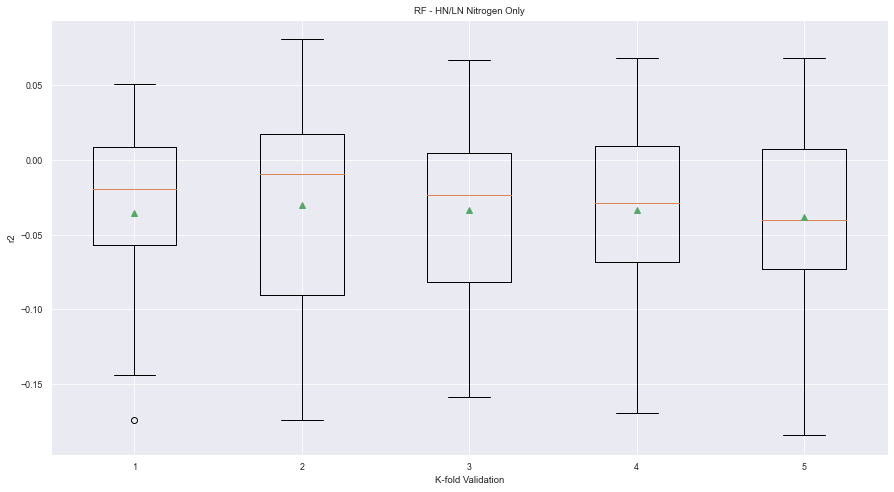

In [18]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - HN/LN Nitrogen Only")
pyplot.show()

## RF - Full Nitrogen


In [19]:
X = sub_df[sub_df.treatment =="HN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="HN"]['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_sta

>1 mean=-0.1523 se=0.072
>2 mean=-0.1530 se=0.039
>3 mean=-0.1474 se=0.031
>4 mean=-0.1396 se=0.022
>5 mean=-0.1405 se=0.021


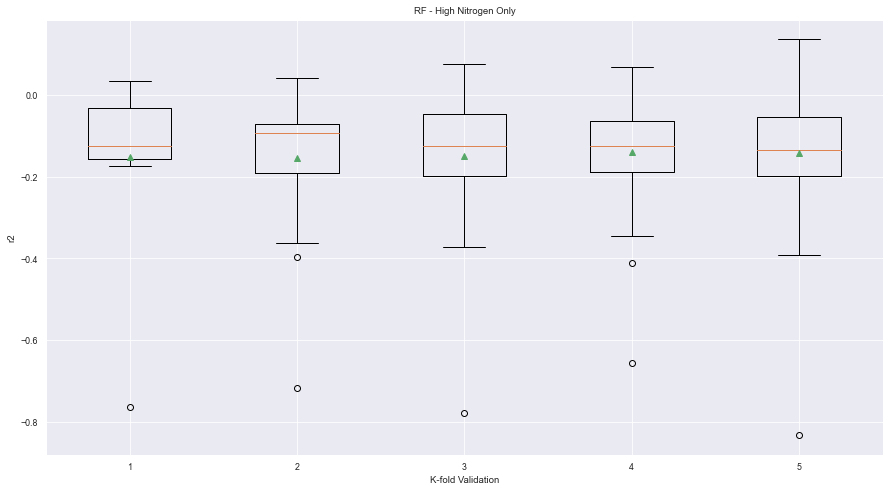

In [20]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - High Nitrogen Only")
pyplot.show()

## RF - Nitrogen Deprived

In [21]:
X = sub_df[sub_df.treatment =="LN"][list(sub_df.columns)[:-2]]
y = sub_df[sub_df.treatment =="LN"]['DaysToBloom']
results = list()
for i in range(1,6):
    scores = evaluate_model(X,y,i)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (i, mean(scores), sem(scores)))
    # store
    results.append(scores)

# cv = KFold(n_splits=10, random_sta

>1 mean=-0.1031 se=0.029
>2 mean=-0.0809 se=0.024
>3 mean=-0.0866 se=0.017
>4 mean=-0.0866 se=0.013
>5 mean=-0.0810 se=0.012


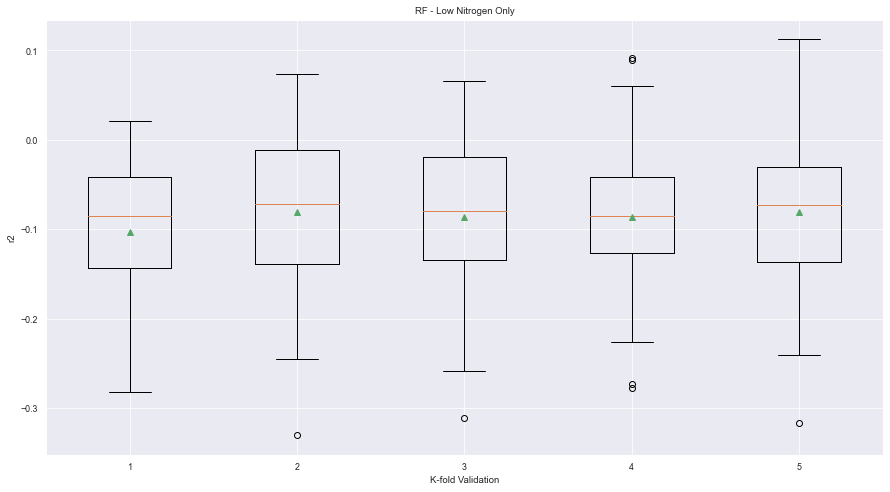

In [22]:
plt.figure(figsize = (15,8))
pyplot.boxplot(results, labels=[str(r) for r in range(1,6)], showmeans=True)
plt.ylabel("r2")
plt.xlabel("K-fold Validation")
plt.title("RF - Low Nitrogen Only")
pyplot.show()